# Heart Disease Research Project

"In this project, we investigate some data from a sample of patients who were evaluated for heart disease at the Cleveland Clinic Foundation. The data was downloaded from the UCI Machine Learning Repository."

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

heart = pd.read_csv('heart_disease.csv')
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63,male,145,233,typical angina,0,1,150,absence
1,67,male,160,286,asymptomatic,1,0,108,presence
2,67,male,120,229,asymptomatic,1,0,129,presence
3,37,male,130,250,non-anginal pain,0,0,187,absence
4,41,female,130,204,atypical angina,0,0,172,absence


In [3]:
# Split up patients with and without heart disease
hd = heart[heart.heart_disease == 'presence']
no_hd = heart[heart.heart_disease == 'absence']

In [17]:
# Average cholesterol levels for both groups
chol_hd = hd.chol
chol_no_hd = no_hd.chol

chol_hd_mean = np.mean(chol_hd)
chol_no_hd_mean = np.mean(chol_no_hd)

print('Heart disease cholesterol level:', chol_hd_mean)
print('No HD cholesterol level:', chol_no_hd_mean)

Heart disease cholesterol level: 251.4748201438849
No HD cholesterol level: 242.640243902439


In [20]:
# Compare this average to the cut-off for high cholesterol
from scipy.stats import ttest_1samp
tstat, pval = ttest_1samp(a=chol_hd, popmean=240, alternative='greater')

print('1 Sample T-Test p-value:', pval)

1 Sample T-Test p-value: 0.0035411033905155703


It would appear that HD patients have an average cholesterol level that that is significantly greater than 240 mg/dl. (Used a significance threshold of 0.05)

In [21]:
# Compare no-HD patients' average to cut-off for high cholesterol
tstat, pval = ttest_1samp(a = chol_no_hd, popmean = 240, alternative = 'greater')

print('1 Sample T-Test p-value:', pval)

1 Sample T-Test p-value: 0.26397120232220506


It would appear that non-HD patients have an average cholesterol level that is NOT significantly greater than 240 mg/ld.

In [23]:
# Calculate total number of patients in this dataset
num_patients = len(heart)

# Calculate number of patients with FBS > 120
num_highfbs = np.sum(heart.fbs)

# Calculate 8% of sample size
print('8% of sample size:', (0.08 * num_patients))

8% of sample size: 24.240000000000002


In [24]:
from scipy.stats import binom_test

pval = binom_test(x = num_highfbs, n = num_patients, p = 0.08, alternative = 'greater')

print('Binomial test p-value:', pval)

Binomial test p-value: 4.6894719514488777e-05


It would appear that this sample likely comes from a population where more than 8% of people have FBS > 120 mg/dl.

## Two-Sample T-Testing

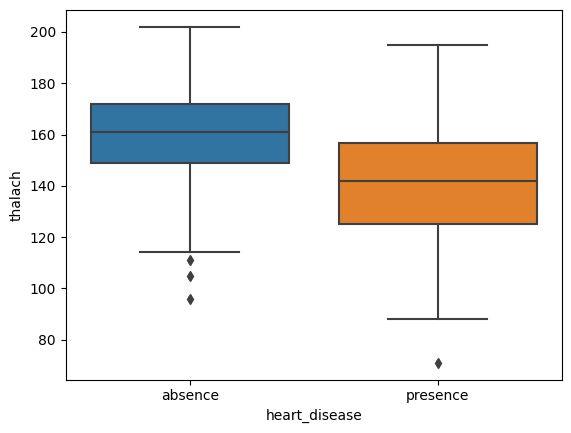

In [5]:
sns.boxplot(x = heart.heart_disease, y = heart.thalach)
plt.show()

This visualization shows that there could be an association between thalach levels and the presence/absence of heart disease, given the boxplots for each of these groups do not overlap very much.

In [6]:
thalach_hd = heart.thalach[heart.heart_disease == 'presence']
thalach_no_hd = heart.thalach[heart.heart_disease == 'absence']

mean_diff = np.mean(thalach_no_hd) - np.mean(thalach_hd)
print('Mean difference:', mean_diff)

Mean difference: 19.11905597473242


In [7]:
# Two Sample T-Test (1 quantitative, 1 binary categorical)
from scipy.stats import ttest_ind

tstat, pval = ttest_ind(thalach_hd, thalach_no_hd)
print('P-value:', pval)

P-value: 3.456964908430172e-14


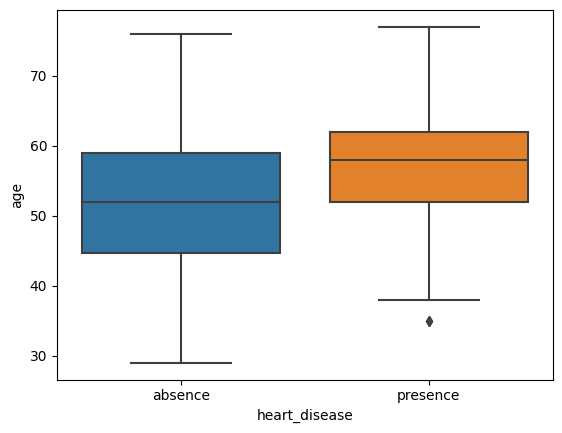

In [8]:
plt.clf()
sns.boxplot(x = heart.heart_disease, y = heart.age)
plt.show()

This visualization shows that there could be an association between age and the presence/absence of heart disease, given there isn't much overlap between the two plots.

In [9]:
age_hd = heart.age[heart.heart_disease == 'presence']
age_no_hd = heart.age[heart.heart_disease == 'absence']

tstat, pval = ttest_ind(age_hd, age_no_hd)
print('P-value:', pval)

P-value: 8.95563691752971e-05


Given the p-value is drastically lower than the significance threshold of 0.05 when comparing these different groups, we can reject the null hypothesis and conclude that having (or not having) heart disease is strongly associated with thalach levels (maximum heart rates).

## ANOVA (Analysis of Variance) and Tukey Range Testing

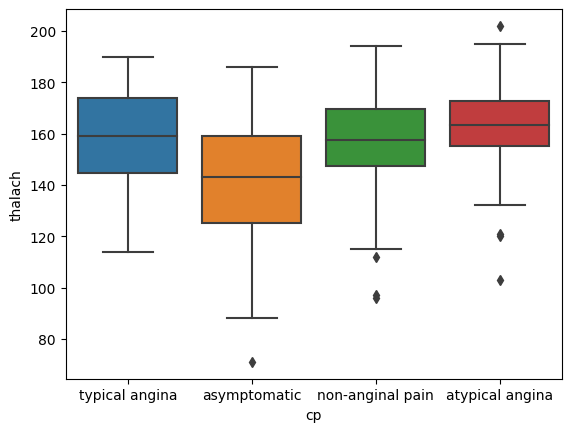

In [10]:
plt.clf()
sns.boxplot(x = heart.cp, y = heart.thalach)
plt.show()

In [11]:
typical = heart.thalach[heart.cp == 'typical angina']
asymptom = heart.thalach[heart.cp == 'asymptomatic']
nonanginal = heart.thalach[heart.cp == 'non-anginal pain']
atypical = heart.thalach[heart.cp == 'atypical angina']

In [12]:
# ANOVA test (1 quantitative, 1 non-binary categorical)
from scipy.stats import f_oneway

fstat, pval = f_oneway(typical, asymptom, nonanginal, atypical)
print('P-value for ANOVA:', pval)

P-value for ANOVA: 1.9065505247705008e-10


In [13]:
# Tukey Range Test (find which pairs DO NOT have the same average thalach levels)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(heart.thalach, heart.cp, 0.05)
print(tukey_results)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394    0.0  12.7442 30.7347   True
    asymptomatic non-anginal pain  14.7264    0.0   7.2583 22.1945   True
    asymptomatic   typical angina   15.276 0.0081   2.9707 27.5812   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7587  2.7327  False
 atypical angina   typical angina  -6.4635 0.6213 -20.2702  7.3432  False
non-anginal pain   typical angina   0.5495 0.9995 -12.3145 13.4136  False
-------------------------------------------------------------------------


## Chi-Square Test

In [14]:
hd_cp_contingency = pd.crosstab(heart.cp, heart.heart_disease)
print(hd_cp_contingency)

heart_disease     absence  presence
cp                                 
asymptomatic           39       105
atypical angina        41         9
non-anginal pain       68        18
typical angina         16         7


In [15]:
# Chi-Square Test (2 categorical variables, groups must be mutually exclusive)
from scipy.stats import chi2_contingency

chi2, pval, dof, expected = chi2_contingency(hd_cp_contingency)
print('Chi-Square p-value:', pval)

Chi-Square p-value: 1.2517106007837527e-17
